In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


### Simple Linear Regression


In [7]:
#loading the dataset 
#it is an excel file so we are using read_excel
df= pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
# we see the column-names don't provide any info to the dataset
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df= df.rename(columns= column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

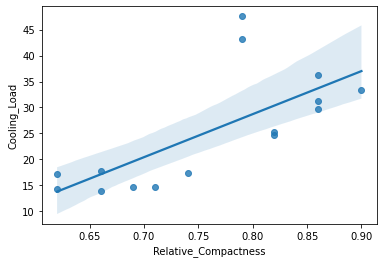

In [9]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

### Multiple Linear Regression


In [10]:
# loading metric
#firstly we normalize the dataset to a common scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_df= pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
normalised_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [11]:
# separating the dataset to features(dependent variables) and target(response variable)
features_df= normalised_df.drop(columns= ['Heating_Load', 'Cooling_Load'])
heating_target= normalised_df['Heating_Load']

#Now splitting the training and testing dataset.
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size= 0.3, random_state= 3)

# importing the model
from sklearn.linear_model import LinearRegression

# creating the model 
linear_model= LinearRegression()

#fit the model 
linear_model.fit(x_train, y_train)

LinearRegression()

#### Mean Absolute Error 

In [12]:
#obtain predictions
predicted_values= linear_model.predict(x_test)

# testing the model
# imprting the required module
from sklearn.metrics import mean_absolute_error

# getting the mean absolute error for the model
mae= mean_absolute_error(y_test, predicted_values)

#printing the mae
round(mae, 3)

0.055

#### Residual sum of Squares

In [13]:
# importing the module
from sklearn.metrics import mean_squared_error

# getting the residual sum of squares
mse= mean_squared_error(y_test, predicted_values)
rmse= np.sqrt(mse)
round(rmse, 3)

0.076

#### Coefficient of Determination R-Squared


In [14]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.925

### Penalization
- Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.

#### Ridge Regression- L2 Regularization 

In [15]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.5)
ridge= ridge_reg.fit(x_train, y_train)

In [16]:
ridge_prediction= ridge_reg.predict(x_test)
# testing the change
ridge_mae= mean_absolute_error(y_test, ridge_prediction)
round(mae, 3)

0.055

#### Lasso Regression- L1 Regularization

In [17]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [1]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

NameError: name 'linear_model' is not defined

In [2]:
linear_model_weights

NameError: name 'linear_model_weights' is not defined

In [20]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [21]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.619502,-0.285552,-0.032644
1,Roof_Area,-0.326619,-0.158044,-0.000000
2,Surface_Area,-0.234761,-0.057291,0.000000
3,Orientation,0.002108,0.002274,0.000000
4,Wall_Area,0.017491,0.104986,0.201389
5,Glazing_Area_Distribution,0.033624,0.033619,0.024846
6,Glazing_Area,0.216298,0.214079,0.208174
7,Overall_Height,0.397152,0.446008,0.462506
